<a href="https://colab.research.google.com/github/AbdoIbrahim/project2/blob/main/Copy_of_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Heart Disease 
##Description of the Data: 
Cardiovascular diseases (CVDs) are the number one cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of five CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.


#Target for Predction:
The Target will be the column Heart Disease since that column has a 0 for negative (this indicates that the patient does not have heart disease) and 1 for positive(this indicates that the patient has heart disease).

#Exploratory Data Analysis 
In this phase we will explore the various features of our dataset. This phase is crucial beecause it will allow us to discover any discrepenacies in the dataset. 

###Import Libraries 

In [ ]:
#Import Libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, r2_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA 

###Load Data 

In [ ]:
#load data
path = '/content/heart.csv'
df = pd.read_csv(path)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
#Explore the columns of the Dataset 
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


(918, 12)

#####There are no duplicate columns and all the columsn contain features that can predict heart disease.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
#Make A copy of the original dataframe for Machine Learning purposes 
ml_df = df.copy()

#All the columns are related to predicting Heart Disease 

In [ ]:
#Check for missing values 
ml_df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There are no missing values 

In [ ]:
#Check for null values 
ml_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There are no Null Values 

In [ ]:
#Check for duplicates 
ml_df.duplicated().sum()

0

There are no Duplicates that need to be removed 

#Check Value Counts of all the columns make sure there aren't any inconsistncies. 

In [ ]:
#Check Categorcal columns value counts for inconsistincies 

for col in ml_df.select_dtypes('object'):
  print(ml_df[col].value_counts())

M    725
F    193
Name: Sex, dtype: int64
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
N    547
Y    371
Name: ExerciseAngina, dtype: int64
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


In [ ]:
#Check Numerical columns value counts for inconsistincies 

for col in ml_df.select_dtypes('number'):
  print(ml_df[col].value_counts())

54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64
120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: RestingBP, Length: 67, dtype: int64
0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: Cholesterol, Length: 222, dtype: int64
0    704
1    214
Name: FastingBS, dtype: int64
150    43
140    41
120    36
130    33
160    25
       ..
63      1
83      1
60      1
78      1
202     1
Name: MaxHR, Length: 119, dtype: int64


In [ ]:
ml_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
#Check Age Column Value Counts 
ml_df['Age'].value_counts()

54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64

Values look normal for age

In [ ]:
ml_df['RestingBP'].value_counts()

120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: RestingBP, Length: 67, dtype: int64

In [ ]:
ml_df['RestingBP'].value_counts()

120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: RestingBP, Length: 67, dtype: int64

In [ ]:
ml_df[ml_df['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [ ]:
ml_df.loc[ml_df['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [ ]:
ml_df = ml_df.drop(index=[449])

In [ ]:
ml_df['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

In [ ]:
ml_df['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

In [ ]:
ml_df[ml_df['FastingBS'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


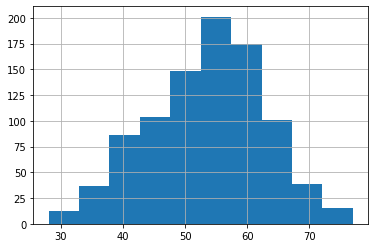

In [ ]:
#Lets Explore the age range of the patients 
ml_df['Age'].hist();

The range of patients is from 40 years old to 60 years old


In [ ]:
#Check Sex Column Value Counts 

ml_df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

The Value counts of sex look normal

> Indented block



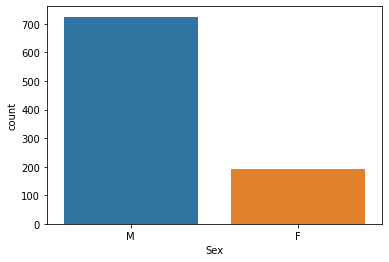

In [ ]:
sns.countplot(x="Sex", data=ml_df);


In [ ]:
#Locate Columns with 0 as avalue for cholesterol
ml_df[ml_df['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [ ]:
ml_df['Cholesterol']

0      289
1      180
2      283
3      214
4      195
      ... 
913    264
914    193
915    131
916    236
917    175
Name: Cholesterol, Length: 918, dtype: int64

There are 172 rows in choloesterol column that have 0 as a value.   

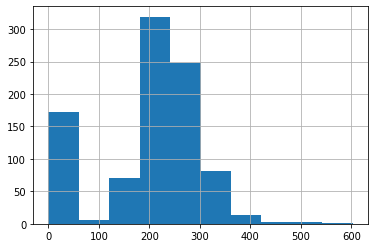

In [ ]:
ml_df['Cholesterol'].hist();

### We have a siginifact amount of values labelled as 0 this is likely a data entry error or as a place holder for missing data. 



In [ ]:
df['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

Values for Fasting BS look normal

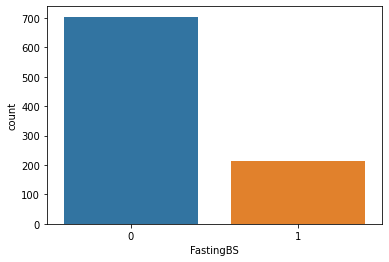

In [ ]:
sns.countplot(x="FastingBS", data=ml_df);


In [ ]:
ml_df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

Values loook normal for this column 

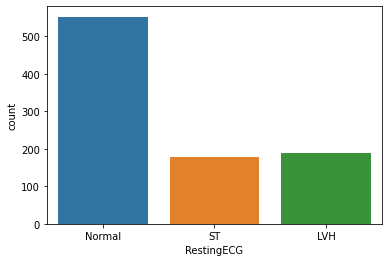

In [ ]:
sns.countplot(x="RestingECG", data=ml_df);


In [ ]:
df['MaxHR'].value_counts()

150    43
140    41
120    36
130    33
160    25
       ..
63      1
83      1
60      1
78      1
202     1
Name: MaxHR, Length: 119, dtype: int64

Values look within the normal range

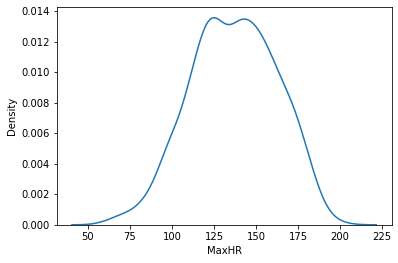

In [ ]:
sns.kdeplot(ml_df['MaxHR'])

In [ ]:
df['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

Values look normal 

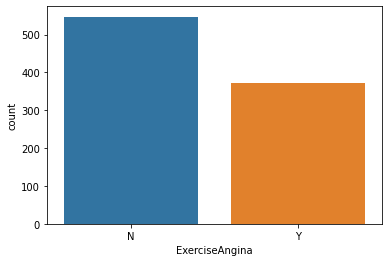

In [ ]:
sns.countplot(x="ExerciseAngina", data=ml_df);


In [ ]:
df['Oldpeak'].value_counts()

 0.0    368
 1.0     86
 2.0     76
 1.5     53
 3.0     28
 1.2     26
 0.2     22
 0.5     19
 1.4     18
 1.8     17
 2.5     16
 0.8     16
 1.6     16
 0.1     14
 0.6     14
 0.4     11
 0.3     11
 4.0      8
 0.7      7
 2.8      7
 1.9      7
 1.3      7
 2.6      7
 1.1      7
 1.7      6
 2.2      5
 0.9      4
 2.4      4
 3.6      4
 3.4      3
 4.2      2
 3.5      2
-0.5      2
 2.3      2
 3.2      2
 2.1      2
-1.0      2
-0.1      2
 5.6      1
 2.9      1
 6.2      1
 3.8      1
-1.5      1
 3.1      1
-2.0      1
 3.7      1
-0.8      1
-0.7      1
-1.1      1
-2.6      1
-0.9      1
 5.0      1
 4.4      1
Name: Oldpeak, dtype: int64

Text(0.5, 1.0, 'Oldpeak')

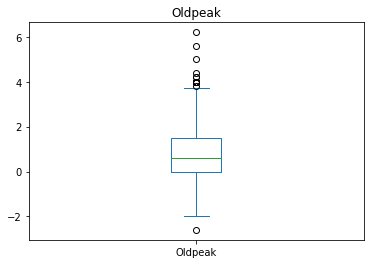

In [ ]:
ml_df['Oldpeak'].plot(kind='box')
plt.title('Oldpeak')


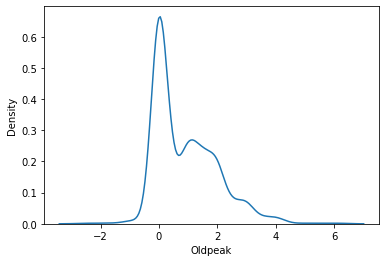

In [ ]:
sns.kdeplot(ml_df['Oldpeak'])

**We can see by the data's distribution that it is not a normal distribution** 

#Identify Outliers 
-2 is an Outlier that is clearly skewing our results. 

Values look normal

In [ ]:
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

Values look normal 

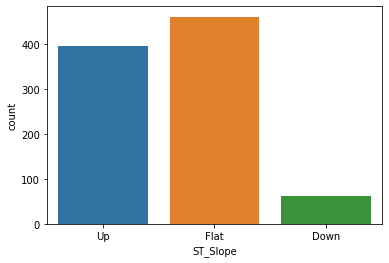

In [ ]:
sns.countplot(x="ST_Slope", data=ml_df);


Distribution of the ST SLope 

In [ ]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

Values look normal 

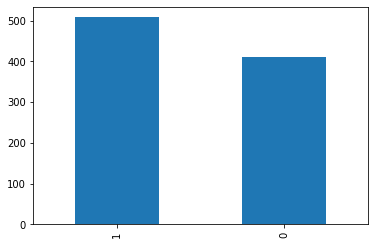

In [ ]:
df['HeartDisease'].value_counts().plot(kind = 'bar')

Proprtion of those with Heart Disease.

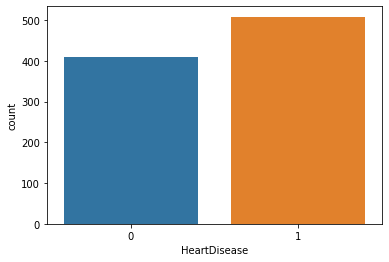

In [ ]:
sns.countplot(x="HeartDisease", data=ml_df);


In [ ]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
ml_df['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [ ]:
ml_df['ExerciseAngina'] = ml_df['ExerciseAngina'].replace({'N':0, 'Y':1})

In [ ]:
ml_df['ExerciseAngina'].value_counts()

0    547
1    371
Name: ExerciseAngina, dtype: int64

##Drop the Cholesterol Column from the DataFrame

In [ ]:
ml_df = ml_df.drop(columns='Cholesterol')

In [ ]:
#from itertools import groupby

#ml_df.plot(kind='line', x='Age', y='HeartDisease',groupby='Age', ax=ax)
#ml_df.plot(kind='line',x='Age',y='', color='red', ax=ax)


In [ ]:
## set axis labels
#ax.set_xlabel('Age')
#ax.set_ylabel('HeartDisease')


In [ ]:


#ml_df.groupby('Age')['HeartDisease'].plot()


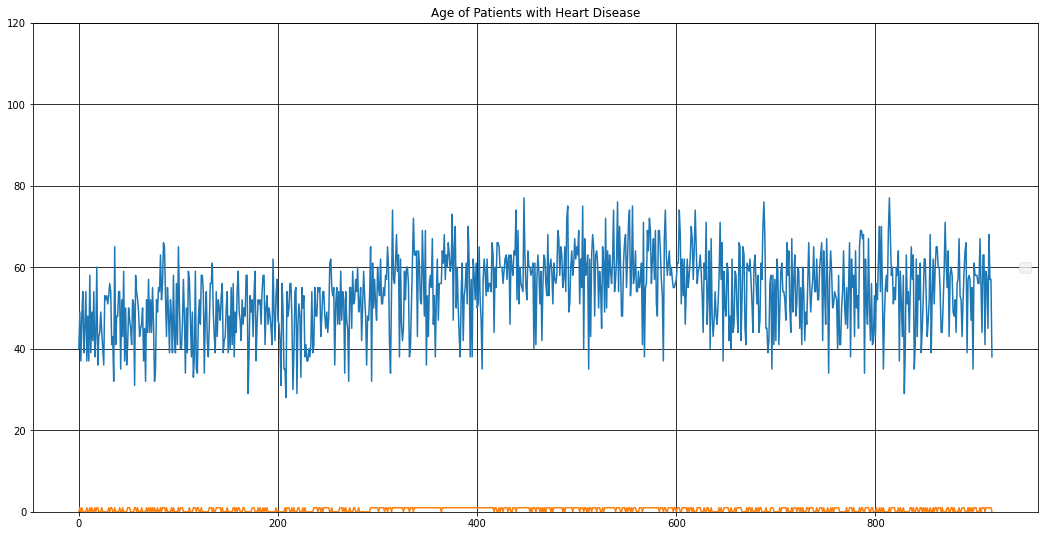

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 18, 9
plt.plot(ml_df['Age'])
plt.plot(ml_df['HeartDisease'])
plt.title('Age of Patients with Heart Disease')
plt.ylim(0, 120)
plt.grid(True, color='k')
plt.style.use('fivethirtyeight')
plt.legend(loc=7);

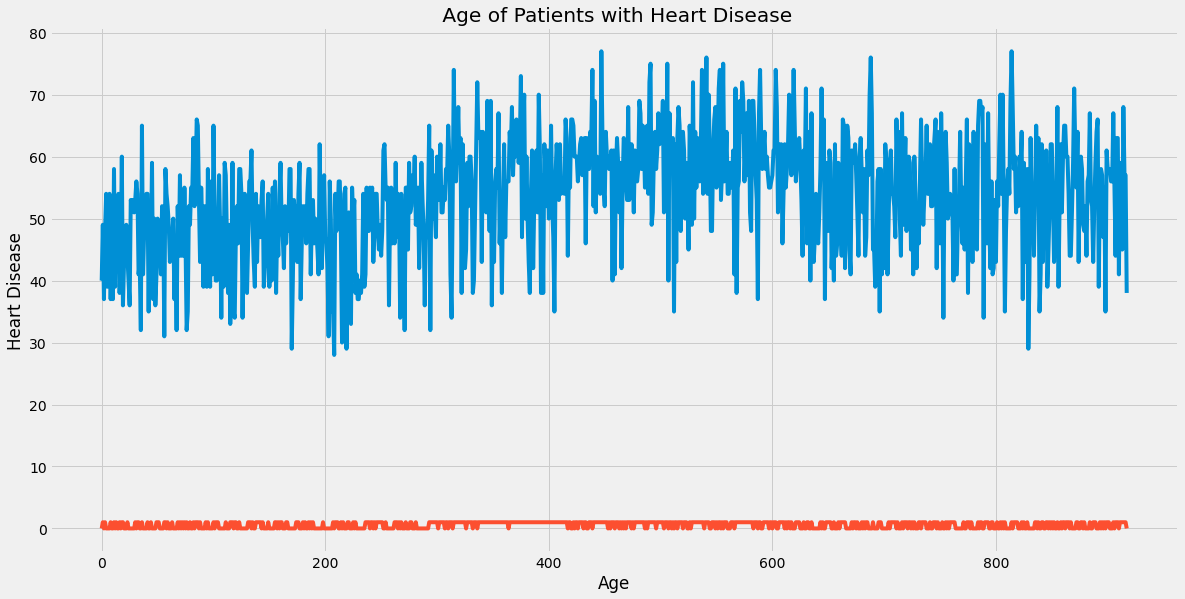

In [ ]:
plt.figure()
#x = ml_df['Age']
#y = ml_df['HeartDisease']
plt.plot(ml_df[['Age', 'HeartDisease']])
#ml_df.groupby('Age')
plt.title(' Age of Patients with Heart Disease')
plt.xlabel('Age')
plt.ylabel('Heart Disease')
plt.show()



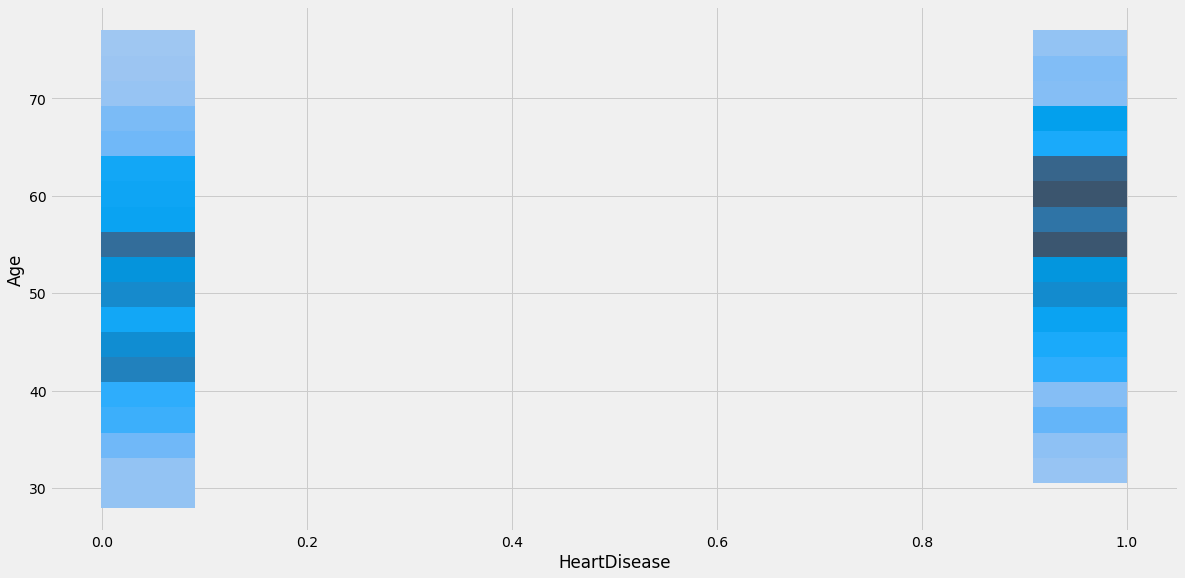

In [ ]:
sns.histplot(data=df, x='HeartDisease', y ='Age')

In [ ]:
#df.groupby('Age').mean()
age_groups = df.groupby('Age').mean()
age_groups
#x = age_groups['Age']
#y = age_groups['HeartDisease']
#plt.plot(x, y)


,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,,,,,,
28,130.000000,132.000000,0.000000,185.000000,0.000000,0.000000
29,130.000000,236.666667,0.000000,177.333333,0.000000,0.000000
30,170.000000,237.000000,0.000000,170.000000,0.000000,0.000000
31,110.000000,244.500000,0.000000,151.500000,0.750000,0.500000
32,110.600000,241.200000,0.200000,152.200000,0.140000,0.400000
33,110.000000,272.000000,0.000000,167.500000,0.500000,0.500000
34,124.142857,163.285714,0.142857,172.571429,0.128571,0.285714
35,126.272727,197.454545,0.090909,158.909091,0.372727,0.363636
36,123.666667,190.333333,0.166667,166.500000,0.833333,0.333333


In [ ]:
df.groupby(['Age'])['HeartDisease'].mean()

Age
28    0.000000
29    0.000000
30    0.000000
31    0.500000
32    0.400000
33    0.500000
34    0.285714
35    0.363636
36    0.333333
37    0.090909
38    0.687500
39    0.133333
40    0.461538
41    0.250000
42    0.166667
43    0.458333
44    0.315789
45    0.166667
46    0.541667
47    0.578947
48    0.483871
49    0.523810
50    0.560000
51    0.428571
52    0.527778
53    0.454545
54    0.450980
55    0.585366
56    0.657895
57    0.684211
58    0.666667
59    0.657143
60    0.750000
61    0.838710
62    0.714286
63    0.766667
64    0.681818
65    0.714286
66    0.538462
67    0.800000
68    0.600000
69    0.769231
70    0.857143
71    0.400000
72    0.750000
73    1.000000
74    0.714286
75    0.666667
76    0.500000
77    1.000000
Name: HeartDisease, dtype: float64

In [ ]:
#df.groupby(['Age']).mean()
age_groups = df.groupby('Age').mean()

plt.plot(age_groups['Age'], age_groups['HeartDisease'])


NameError: ignored

In [ ]:
df.groupby('Age').plot(legend=True)


In [ ]:
df.groupby(['Age']) ['HeartDisease'].mean().plot()


In [ ]:
pd.pivot_table(df.reset_index(),
               index='HeartDisease', columns='Age', values='Age'
              ).plot(subplots=True)

#Visualzation 1 

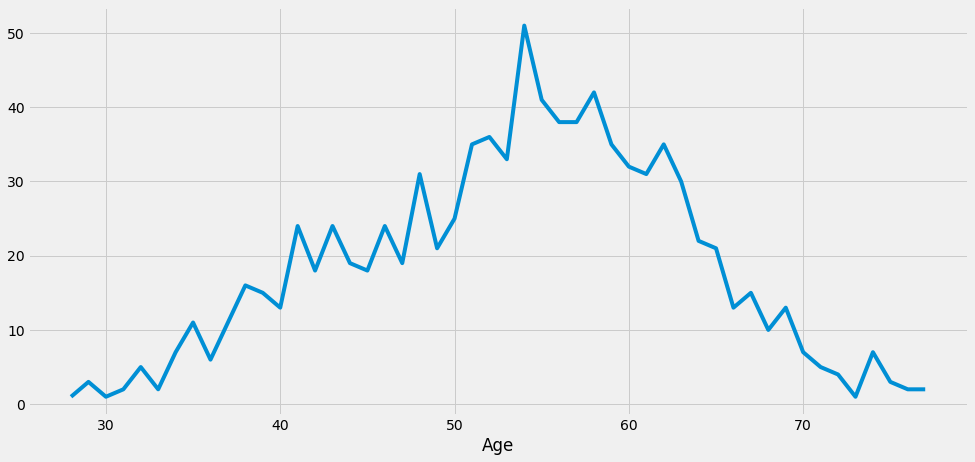

In [ ]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Age']).count()['HeartDisease'].plot(ax=ax)


#Visualization 2 

[Text(0.5, 1.0, 'Age of People with Heart Disease')]

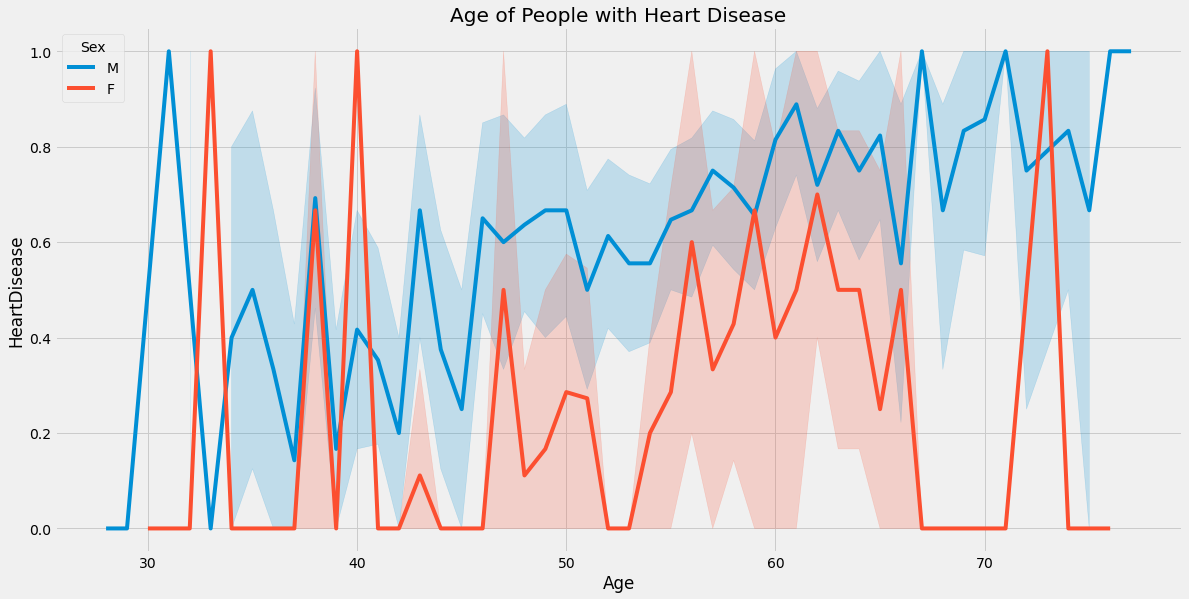

In [ ]:
sns.lineplot(data=df, x='Age', y='HeartDisease', hue='Sex').set(title='Age of People with Heart Disease')


###Select Target + Features Matrix

In [ ]:
X= ml_df.drop(columns='HeartDisease')
y = ml_df['HeartDisease']

###Instantiate Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Prepare Preprocessing tool 

In [ ]:
#instantiate a scaler 
scaler = StandardScaler()

In [ ]:
# instantiate One Hot Encoder 
encoder = OneHotEncoder(handle_unknown ='ignore')

In [ ]:
#Make a selector for categorical columns 
cat_selector = make_column_selector(dtype_include ='object')

In [ ]:
cat_processor = make_pipeline(encoder)

In [ ]:
cat_tuple = (cat_processor, cat_selector )

In [ ]:
column_transformer = make_column_transformer(cat_tuple, remainder='passthrough')

In [ ]:
column_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5b96826990>)])

#KNN Model

In [ ]:
#instantiate an Instance of KNeighbors Classifier 
knn = KNeighborsClassifier()

In [ ]:
#Get the Parameters of the default knn model 
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
knn_pipe = make_pipeline(column_transformer, knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5b96826990>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
# Make variable Preds to predict the values of the test set 
y_preds = knn_pipe.predict(X_test)
y_preds

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0])

In [ ]:
#Evaluate the Test Score of the KNN Neighbors model 
score = knn_pipe.score(X_test, y_test)
score

0.6521739130434783

In [ ]:
#Find the Accuracy Score for the default knn model 
knn_acc = accuracy_score(y_test, y_preds)
knn_acc

0.6521739130434783

In [ ]:
#Display the Classification report of the Default knn model
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.58      0.68      0.63        98
           1       0.73      0.63      0.67       132

    accuracy                           0.65       230
   macro avg       0.65      0.66      0.65       230
weighted avg       0.66      0.65      0.65       230



In [ ]:
#Define Hyperparameters that you want to test 
knn_params = {'kneighborsclassifier__n_neighbors': [5, 7, 9, 11],
              'kneighborsclassifier__leaf_size' : [5, 10, 15, 30]}

In [ ]:
#Instantiate the Grid Search CV to find the best parameters 
knn_gs = GridSearchCV(knn_pipe, knn_params)

knn_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f5b96826990>)])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__leaf_size': [5, 10, 15, 30],
                         'kneighborsclassifier__n_neighbors': [5, 7, 9, 11]})

In [ ]:
#Evaluate the Test Score of the KNN Neighbors Hypertuned model 
score = knn_gs.score(X_test, y_test)
score

0.691304347826087

In [ ]:
#Create predictions for the Hypertuned knn model
knn_gs_y_preds = knn_gs.predict(X_test)
knn_gs_y_preds

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [ ]:
#Evaluate the Accuracy score of the Hypertuned knn model 
knn_gs_acc = accuracy_score(y_test, knn_gs_y_preds )
knn_gs_acc

0.691304347826087

In [ ]:
#Evaluate the classification report for the hypertuned knn model
print(classification_report(y_test, knn_gs_y_preds))

              precision    recall  f1-score   support

           0       0.63      0.67      0.65        98
           1       0.74      0.70      0.72       132

    accuracy                           0.69       230
   macro avg       0.69      0.69      0.69       230
weighted avg       0.69      0.69      0.69       230



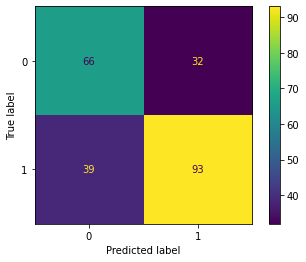

In [ ]:
# I made a Confusion Matrix to reprsent the Hypertuned Knn model 
ConfusionMatrixDisplay.from_predictions(y_test, knn_gs_y_preds)

#Logistic Regression 

#Base Logistic Regression Model

In [ ]:
log_reg_pipeline = make_pipeline(column_transformer, LogisticRegression())

In [ ]:
#fit the pipeline on the training dataset 
log_reg_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5b96826990>)])),
                ('logisticregression', LogisticRegression())])

In [ ]:
# check the Train and Test Scores 
print(f'Logistic Regression Train Score:{log_reg_pipeline.score(X_train, y_train)}')
print(f'Logistic Regression Test Score:{log_reg_pipeline.score(X_test, y_test)}')

Logistic Regression Train Score:0.8575581395348837
Logistic Regression Test Score:0.8695652173913043


In [ ]:
#create a y pred value 
y_pred_logreg = log_reg_pipeline.predict(X_test)
print(y_pred_logreg)

[0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1
 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1
 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1
 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0
 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0
 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1
 1 0 1 0 1 1 0 0]


In [ ]:
#Evaluate the Test Score of the Logistic Regression model 
logreg_score = log_reg_pipeline.score(X_test, y_test)
logreg_score

0.8695652173913043

In [ ]:
#Display the Classification report of the Logistic Regression model
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85        98
           1       0.90      0.86      0.88       132

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230



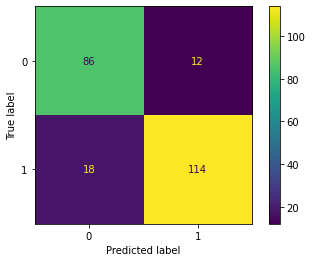

In [ ]:
# I made a Confusion Matrix to represent the default Logistic Regression Model  
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_logreg)

#Hypertuned Logistic Regression Model 

{0.0001: 0.4260869565217391,
 0.001: 0.6478260869565218,
 0.01: 0.7,
 0.1: 0.8652173913043478,
 1: 0.8695652173913043,
 10: 0.8608695652173913,
 100: 0.8565217391304348,
 1000: 0.8565217391304348}

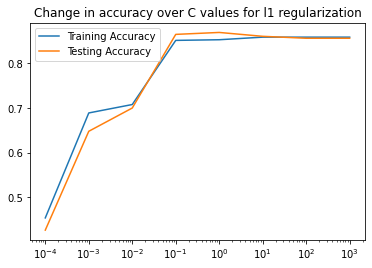

In [ ]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
for c in c_values:
 
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg_pipe = make_pipeline(column_transformer, log_reg)
  log_reg_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

In [ ]:
logreg_1 = LogisticRegression(C = 0.1, solver='liblinear', penalty='l1')
logreg_pipe_1 = make_pipeline(column_transformer, logreg_1 )
logreg_pipe_1.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5b96826990>)])),
                ('logisticregression',
                 LogisticRegression(C=0.1, penalty='l1', solver='liblinear'))])

In [ ]:
#create a  prediction variable 
y_pred_logbest = logreg_pipe_1.predict(X_test)
print(y_pred_logbest)

[0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1
 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1
 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1
 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1
 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0
 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1
 1 1 1 0 1 1 0 0]


In [ ]:
# check the Train and Test Scores 
print(f'Hypertuned Logistic Regression Train Score:{logreg_pipe_1.score(X_train, y_train)}')
print(f'Hypertuned Logistic Regression Test Score:{logreg_pipe_1.score(X_test, y_test)}')

Hypertuned Logistic Regression Train Score:0.8517441860465116
Hypertuned Logistic Regression Test Score:0.8652173913043478


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5b96826990>)])),
                ('pca', PCA()),
                ('logisticregression',
                 LogisticRegression(C=1, penalty='l1', solver='liblinear'))])

In [ ]:
#Display the Classification report of the Hypertuned Logistic Regression model
print(classification_report(y_test,y_pred_logbest))

              precision    recall  f1-score   support

           0       0.61      0.67      0.64        98
           1       0.74      0.68      0.71       132

    accuracy                           0.68       230
   macro avg       0.67      0.68      0.67       230
weighted avg       0.68      0.68      0.68       230



#Run the Model using  PCA 

In [ ]:
pca = PCA(n_components=.95)

In [ ]:
logreg_pca = LogisticRegression(C = 0.1, solver='liblinear', penalty='l1')
logreg_pca_pipe = make_pipeline(column_transformer, pca, logreg_1 )
logreg_pca_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5b96826990>)])),
                ('pca', PCA(n_components=0.95)),
                ('logisticregression',
                 LogisticRegression(C=0.1, penalty='l1', solver='liblinear'))])

In [ ]:
print(f'Hypertuned Logistic with PCA Regression Train Score:{logreg_pca_pipe.score(X_train, y_train)}')
print(f'Hypertuned Logistic with PCA Regression Test Score:{logreg_pca_pipe.score(X_test, y_test)}')

Hypertuned Logistic with PCA Regression Train Score:0.6991279069767442
Hypertuned Logistic with PCA Regression Test Score:0.6739130434782609


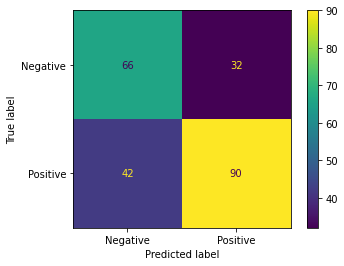

In [ ]:
labels=['Negative','Positive']
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_logbest, display_labels=labels)

##Interperation and Model Selection 
For this Dataset we are attempting to create a model that can predict whether a patient has Heart Disease or not. 

* One of the worst things for a model that is assigned this task is that it does not reduce Type 2 Errors. Type 2 Errors/ False Negatives would reduce the accuracy of the model in predicting the occurence of Heart Disease. 

* The model able to reeduce Type 2 Errors effectively was the Base Logistic Regression Model I will use this model to predict whether patients have heart disease or not. 
